# Machine Learning with PyTorch and Scikit-Learn  
# -- Code Examples

## Package version checks

Add folder to path in order to load from the check_packages.py script:

In [38]:
# * import sys
# Importa el módulo sys, que es un módulo de la biblioteca estándar de Python.
# Este módulo proporciona acceso a variables y funciones que interactúan fuertemente con el
# intérprete de Python, como la manipulación de la ruta de búsqueda de módulos y la entrada/salida
# estándar, entre otros.
# * sys.path
# Es una lista que contiene las rutas en las que el intérprete de Python busca los módulos cuando
# usas import. Al intentar importar un módulo, Python busca en las rutas especificadas en esta
# lista.
# * sys.path.insert(0, '..')
# Inserta la ruta '..' (que representa el directorio padre) al inicio de la lista sys.path.
# Al agregarla en la posición 0, se asegura que cuando Python busque módulos para importar,
# primero verifique en el directorio padre antes de continuar con las rutas predeterminadas.

import sys
sys.path.insert(0, '..')

Check recommended package versions:

In [39]:
# * from python_environment_check import check_packages
# Importa la función check_packages desde el módulo python_environment_check. 
# Este módulo, por su nombre, parece estar diseñado para verificar que el entorno de Python 
# tenga instaladas las versiones correctas de ciertos paquetes.
# * d = {...}
# Define un diccionario d que contiene como claves los nombres de varios paquetes 
# (por ejemplo, numpy, scipy, matplotlib, etc.) y como valores las versiones mínimas 
# requeridas de esos paquetes.
# * check_packages(d)
# La función check_packages toma como entrada el diccionario d y probablemente realiza una 
# verificación en el entorno actual de Python para asegurarse de que las versiones instaladas 
# de estos paquetes sean al menos las especificadas en el diccionario. Si alguno de los paquetes 
# no está instalado o tiene una versión incorrecta, es posible que la función lance un error o 
# sugiera instalar/actualizar los paquetes.

from python_environment_check import check_packages
d = {
    'numpy': '1.21.2',
    'mlxtend': '0.19.0',
    'matplotlib': '3.4.3',
    'sklearn': '1.0',
    'pandas': '1.3.2',
}
check_packages(d)

[OK] numpy 1.26.4
[OK] mlxtend 0.23.1
[OK] matplotlib 3.5.1
[OK] sklearn 1.5.2
[OK] pandas 2.2.2


# Example 1 - Admission Dataset

### Overview

- [Data Analysis](#data-analysis)
- [Training a perceptron and a logistic regression model via scikit-learn](#training-a-perceptron-and-a-logistic-regression-model-via-scikit-learn)
- [Summary](#summary)

In [40]:
# * from IPython.display
# Importa desde el submódulo display del paquete IPython. Este módulo está diseñado para mostrar 
# y renderizar diferentes tipos de datos dentro de entornos interactivos, como Jupyter Notebooks.
# * import Image
# Importa la clase Image desde el módulo display. La clase Image se utiliza para mostrar 
# imágenes en el entorno interactivo (por ejemplo, en una celda de Jupyter Notebook).
# * %matplotlib inline
# Esto es una "magic command" (comando mágico) específico de IPython/Jupyter Notebook.
# Habilita la visualización de gráficos de matplotlib directamente dentro de las celdas del 
# notebook. Los gráficos se renderizan "en línea" (dentro del mismo cuaderno) sin necesidad 
# de abrir ventanas emergentes.

from IPython.display import Image
%matplotlib inline

# Data Analysis

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [42]:
dataset = pd.read_csv("admission.csv")

# Uses the pandas library, which is as pd, to read a CSV (Comma-Separated Values) file named "admission.csv".
# A CSV file stores data in a tabular format, with rows and columns, and is commonly used for exchanging and storing datasets.
# read_csv is a function from pandas used to load data from a CSV file into a DataFrame object.
# A DataFrame is a two-dimensional data structure provided by the pandas library.
pd.set_option('display.max_columns', len(dataset.columns))

# For pandas to adjust the maximum number of columns displayed to match the actual number of columns in the dataset.
dataset.head(1)

# This is a method called in the pandas library that is used to display the first 5 rows of a DataFrame.

,Student ID,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92


In [43]:
# Let's look at the exact column's name
dataset.columns

Index(['Student ID', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

In [44]:
# Student ID: This is a unique identifier assigned to each student in the dataset.

# GRE Score: This column contains the scores obtained by students on the Graduate Record Examination
# (GRE), whic is a standarized test used for admissions to many graduate schools in the United
# States and other countries. It ranges from 0 to 340.

# University Rating: This column might represent a rating or ranking of the universities attended by
# the applicants, usually on a scale (from 1 to 5). Higher ratings may indicate more prestigious or 
# well-regarded institutions.

# SOP (Statement Of Purpose): This is a numeric score (on a scale on 1 to 5) that reflects the quality
# of the Statement Of Purpose submitted by the student. The SOP is a crucial part of the application,
# where applicants explain their motivations, goals, and why they are applying to the program.

# LOR (Letter Of Recommendation): Similar to SOP, this could represent a score (on a sclae of 1 to 5)
# that assesses the strength of the Letters Of Recomendation provided by the applicant. Strong LORs
# can significantly influence admission decisions.

# CGPA (Cumulative Grade Point Average): This column shows the overall academic performance of the 
# student during their previous studies, usually on a scale (from 0 to 10). CGPA is a critical
# indicator of a student academic capabilities.

# Research. This might be a binary indicator (0 or 1) showing whether the applicant has research
# experience. Research experience can be an important factor in graduate admissions, particularly for
# programs that emphasize research.

# Chance Of Admit: This columns represents the probability of the student being admitted to the
# program.

In [45]:
dataset_anonymized = dataset.drop(["Student ID"], axis=1)

# dataset refers to the original pandas DataFrame that contains the dataset, including all its columns and rows.
# .drop() is a method provided by pandas to remove specified labels fromrows or columns in a DataFrame.
# It returns a new DataFrame with the specified column removed.

dataset_anonymized.to_csv('dataset_anonymized.csv', index=False)

# save a pandas DataFrame to a CSV (Comma-Separated Values) file.
dataset_anonymized.corr()

# dataset_anonymized refers to the pandas DataFrame that has already been processed.
# .corr() is a method that calculates the pairwise correlation of all numeric columns in the DataFrame.
# It returns a new DataFrame (correlation matrix) that shows the correlation coefficients between each
# pair of numeric columns.
# By default, it calculates the Person correlation coefficient, but it can aldo compute Kendall and Spearman
# correlation coefficients it specified.
# https://en.wikipedia.org/wiki/Person_correlation_coefficient

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


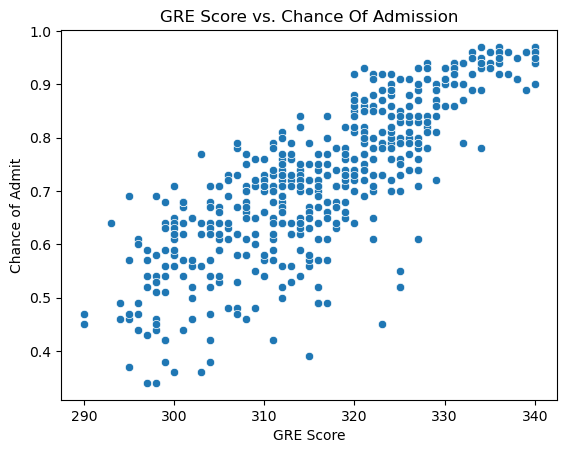

In [46]:
import seaborn as sb

sb.scatterplot(x='GRE Score', y='Chance of Admit', data=dataset_anonymized)
plt.title('GRE Score vs. Chance Of Admission')
plt.show()

<AxesSubplot:>

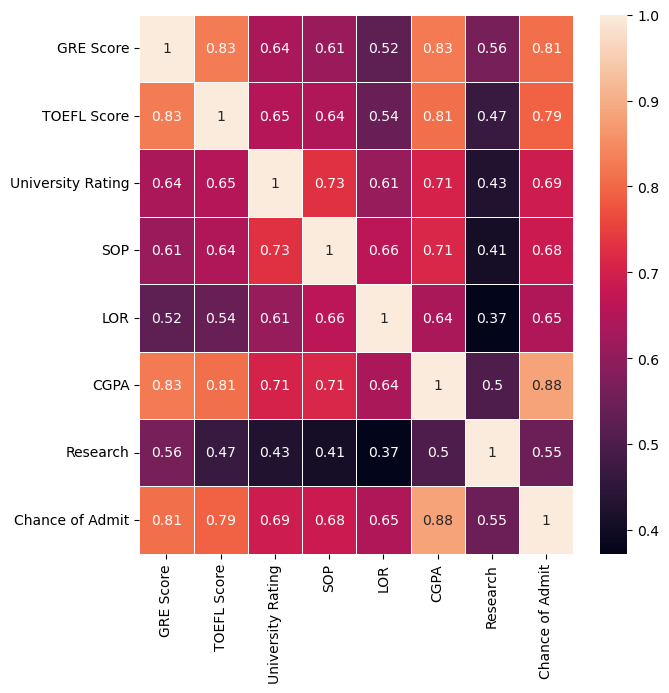

In [47]:
fig, ax = plt.subplots(figsize=(7,7))
sb.heatmap(dataset_anonymized.corr(), linewidth=0.5, annot=True)

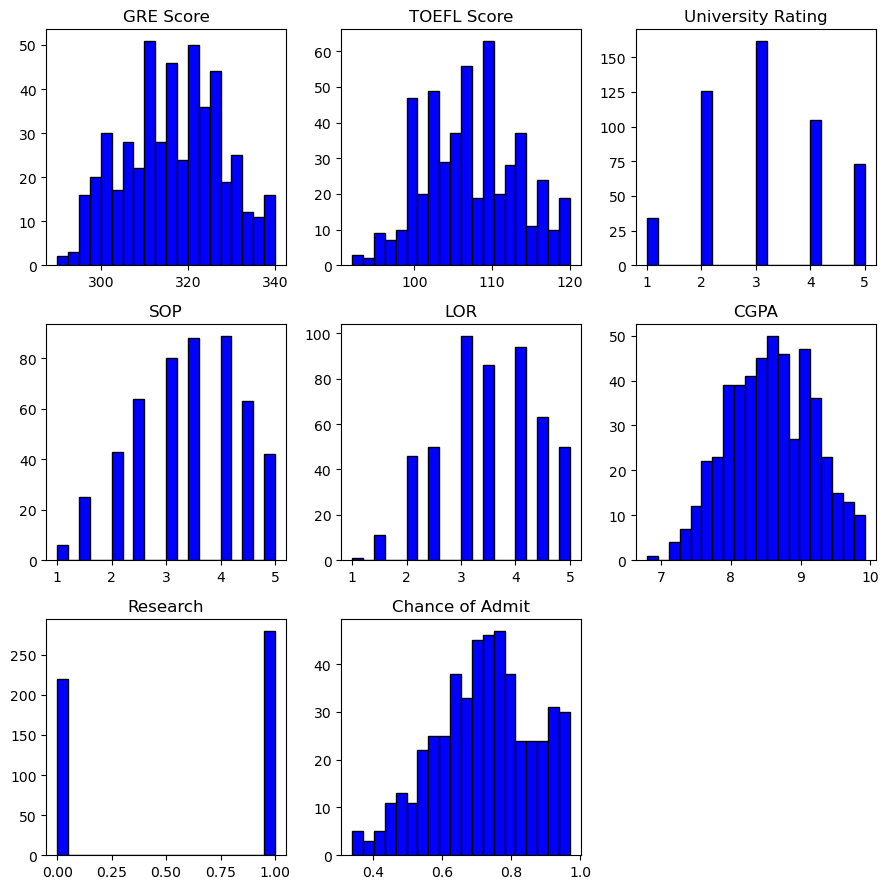

In [48]:
columns = dataset_anonymized.columns

# columns = dataset_anonymized.columns retrieves the names of the columns in the dataset_anonymized DataFrame
# and stores them in the variable columns.

fig = plt.figure(figsize=(9,9))
# This line creates a new figure for plotting. The figsize parameter sets the size of the figure to 9 inches by 9 inches.

for i in range(0,8):

    ax = plt.subplot(3, 3, i+1)

    # This line creates a subplot within the figure. The subplot(3, 3, i+1) indicates that the figure will be divided
    # into a grid of 3 rows and 3 columns, and the current subplot being created is indexed as i+1.
    ax.hist(dataset_anonymized[columns[i]], bins=20, color='blue', edgecolor='black')
    # This line generates a histogram for the i-th column in dataset_anonymized.CGPA

    ax.set_title(columns[i])
    # This line sets title of current subplot to the name of the column being plotted.

plt.tight_layout()
# This function adjusts the padding between and around subplot in the figure.

plt.show()
# This line displays the figure

In [49]:
# Replace 'Chance Of Admit' with a binary admission decision based on the threshold
dataset_anonymized['Admission Decision'] = (dataset_anonymized['Chance of Admit'] >= 0.5).astype(int)

# dataset_anonymized['Chance Of Admit'] >= 0.5 evaluates whether the values in the Chance Of Admit column are
# greater than or equal to 0.5. The result is a boolean series where each entry is True if the corresponding Chance Of
# Admit is 0.5 or higher, and False otherwise.

# .astype(int) converts the boolean series into integers.

dataset_anonymized_decision = dataset_anonymized.drop(columns=['Chance of Admit'])

# Drops the original 'Chance Of Admit' column if no longer needed

In [50]:
print(dataset_anonymized_decision.head())
# Displays the first rows to check the changes.

   GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  Research  \
0        337          118                  4  4.5  4.5  9.65         1   
1        324          107                  4  4.0  4.5  8.87         1   
2        316          104                  3  3.0  3.5  8.00         1   
3        322          110                  3  3.5  2.5  8.67         1   
4        314          103                  2  2.0  3.0  8.21         0   

   Admission Decision  
0                   1  
1                   1  
2                   1  
3                   1  
4                   1  


In [51]:
dataset_anonymized_decision.info()
# Visualizes the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   GRE Score           500 non-null    int64  
 1   TOEFL Score         500 non-null    int64  
 2   University Rating   500 non-null    int64  
 3   SOP                 500 non-null    float64
 4   LOR                 500 non-null    float64
 5   CGPA                500 non-null    float64
 6   Research            500 non-null    int64  
 7   Admission Decision  500 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 31.4 KB


In [52]:
# Separate the class label (Admission Decision) from the rest.
Y = dataset_anonymized_decision.iloc[:,-1].values

# dataset_anonymized_decision is the name of the DataFrame from whic you want to extract the last column.
# The .iloc[] indexer is used for integer-location based indexing. It allows you to select rows and columns by their position index.
# The : indicates that you want to select all rows.
# The -1 specifies the last column of the DataFrame.
X = dataset_anonymized_decision.drop(["Admission Decision"], axis=1)

# Creates a new DataFrame X by removing the Admission Decision column from the dataset_anonymized_decision DataFrame.

## Training a perceptron and a logistic regression model via scikit-learn

In [53]:
from sklearn.model_selection import train_test_split # splitting
X_train, X_test, Y_train, Y_test = train_test_split(X.values, Y, test_size=0.25, random_state=1)

# Separates the train and test datasets

In [54]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [55]:
# The Perceptron class from the sklearn.linear_model module is imported. The Perceptron is an algorithm 
# Linear classification that updates weights using perceptron learning rule.
from sklearn.linear_model import Perceptron

# An instance of the Perceptron model is created with the following parameters:
# * eta0=0.1
# Learning rate, which controls how much the weights are adjusted in each iteration.
# * random_state=1
# Set a random seed to ensure reproducibility of results.
ppn = Perceptron(eta0=0.1, random_state=1)

# The ppn model is trained with the standardized training data set 
# (X_train_std) and its corresponding tags (y_train).
# The fit method adjusts the model by calculating the weights that best separate the classes in the 
# training data.
ppn.fit(X_train_std, Y_train)

Perceptron(eta0=0.1, random_state=1)

In [56]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0, solver='lbfgs')
lr.fit(X_train_std, Y_train)

Y_pred = lr.predict(X_test_std)
print("Misclassification samples: %d" % (Y_test != Y_pred).sum())
print(Y_test != Y_pred)

row = 32
print('Actual label for the first test sample: %d' % Y_test[row])

lr.predict_proba(X_test_std[:3,:])
lr.predict_proba(X_test_std[:3,:]).sum(axis=1)

Misclassification samples: 6
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False  True False False False False False False False False  True False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False  True False False False False False False False False False False
 False False False False False False False False False False False False
 False  True False False False False False False False False False False
 False False False False False False False False False False  True False
 False  True False False False]
Actual label for the first test sample: 1


array([1., 1., 1.])

# Summary

---

Readers may ignore the next cell.

In [57]:
# Run a command in the terminal from a Python environment (such as a Jupyter Notebook or a 
# script that allows system commands to convert a Jupyter notebook to a file Python script. 
# * !
# This symbol is used in environments such as Jupyter Notebooks to execute system commands 
# operational directly from the notebook. In this case, the command is an execution of a 
# python script.
# * python ../.convert_notebook_to_script.py
# This command runs a Python script called convert_notebook_to_script.py. This file 
# is located in the previous directory (../ indicates that it is one level up in the system 
# files). The purpose of this script is to convert a Jupyter notebook (.ipynb) into a 
# Python script file (.py).
# * --input ex01.ipynb
# This is an option or argument that tells the script what the input file is, in this 
# case, the notebook ex01.ipynb.
# * --output ex01.py
# This option tells the script to save the output (the converted file) with the name 
# ex01.py, which is a Python script.

! python ../.convert_notebook_to_script.py --input ex01.ipynb --output ex01.py

[NbConvertApp] Converting notebook ex01.ipynb to script
[NbConvertApp] Writing 12941 bytes to ex01.py
